In [23]:
%matplotlib inline

# model
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline(
    [
        ('polynomial_featuers', polynomial_features), 
        ('linear_regression', linear_regression)
    ])
    return pipeline


In [50]:
n_dots = 200
x = np.linspace(-2*np.pi, 2*np.pi,n_dots)
#x = np.linspace(-20, 20,n_dots)

In [51]:
y = np.sin(x) + 0.2 * np.random.rand(n_dots) - 0.1

In [52]:
print x.shape, y.shape

(2000L,) (2000L,)


In [53]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print x.shape, y.shape

(2000L, 1L) (2000L, 1L)


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
degrees = [2,3,5,10]#[11,12,13,14,15, 16]
results = []
for d in degrees:
    model = polynomial_model(degree=d)
    model.fit(x, y)
    train_score = model.score(x, y)
    mse = mean_squared_error(y, model.predict(x))
    results.append({
        'model':model,
        'degree': d,
        'score': train_score,
        'mse': mse
    })
    
for r in results:
    print("degree: {}; train score: {}; mean squared error: {}".format(r['degree'], r['score'], r['mse']))

degree: 2; train score: 0.152677879748; mean squared error: 0.426427415244
degree: 3; train score: 0.287189935278; mean squared error: 0.358732229684
degree: 5; train score: 0.900239087159; mean squared error: 0.0502061579515
degree: 10; train score: 0.993508898355; mean squared error: 0.00326674310793


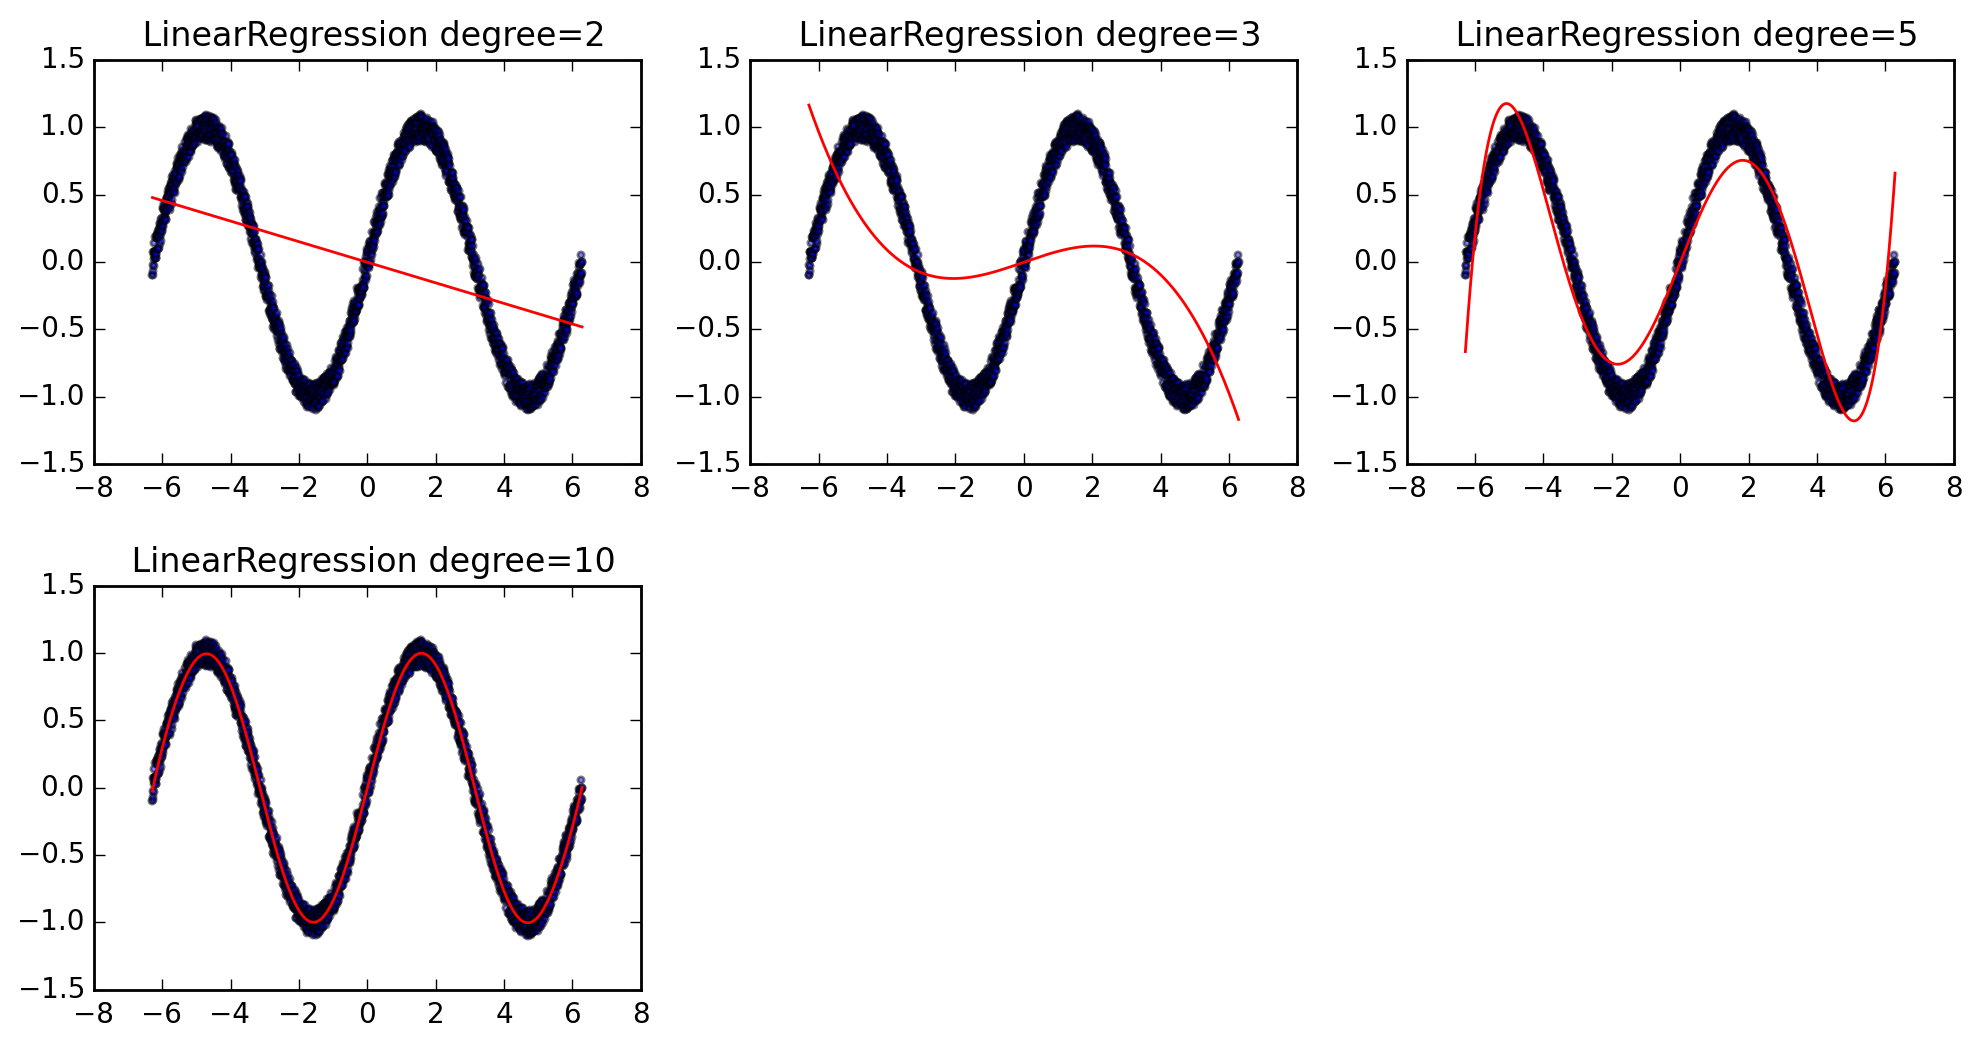

In [56]:
from matplotlib. figure import SubplotParams 
import matplotlib.pyplot as plt

plt. figure( figsize=( 12, 6), dpi= 200, subplotpars= SubplotParams( hspace= 0.3))
for i, r in enumerate( results): 
    fig = plt. subplot( 2, 3, i+ 1) 
    plt. xlim(-8, 8) 
    plt. title(" LinearRegression degree={}". format( r["degree"])) 
    plt. scatter( x, y, s= 5, c='b', alpha= 0.5) 
    plt. plot( x, r["model"]. predict(x), 'r-')



### 波士顿房价

In [57]:
from sklearn.datasets import load_boston 

In [58]:
boston = load_boston()
x = boston.data
y = boston.target
print x.shape, y.shape

(506L, 13L) (506L,)


In [60]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [66]:
bdata = pd.DataFrame(boston.data, columns=boston.feature_names)

In [67]:
bdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [71]:
import time
from sklearn.linear_model import LinearRegression

model = LinearRegression()
start = time.clock()
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
cv_score = model.score(x_test, y_test)
print('elaspe: {0:.6f}; train score: {1:0.6f}; cv_score: {2:0.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.002011; train score: 0.728582; cv_score: 0.778721


In [72]:
model = LinearRegression(normalize=True)
start = time.clock()
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
cv_score = model.score(x_test, y_test)
print('elaspe: {0:.6f}; train score: {1:0.6f}; cv_score: {2:0.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.002658; train score: 0.728582; cv_score: 0.778721


In [73]:
model = polynomial_model(degree=2)
start = time.clock()
model.fit(x_train, y_train)
train_score = model.score(x_train, y_train)
cv_score = model.score(x_test, y_test)
print('elaspe: {0:.6f}; train score: {1:0.6f}; cv_score: {2:0.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.028801; train score: 0.929770; cv_score: 0.895849


In [74]:
from sklearn.model_selection import ShuffleSplit, learning_curve

def plot_learning_curve(estimator, title, 
                        x, y, 
                        ylim=None, 
                        cv=None,
                        n_jobs=1, 
                        train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores  = learning_curve(
                                    estimator, x, y, 
                                    cv=cv,
                                   n_jobs=n_jobs,
                                   train_sizes=train_sizes)
    #print(train_sizes, train_scores, test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, 
                    alpha=0.1,
                    color='r')
    plt.fill_between(train_sizes, 
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, 
                    alpha=0.1,
                    color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', 
            label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
            label='Cross-validation score')
    plt.legend(loc='best')
    return plt

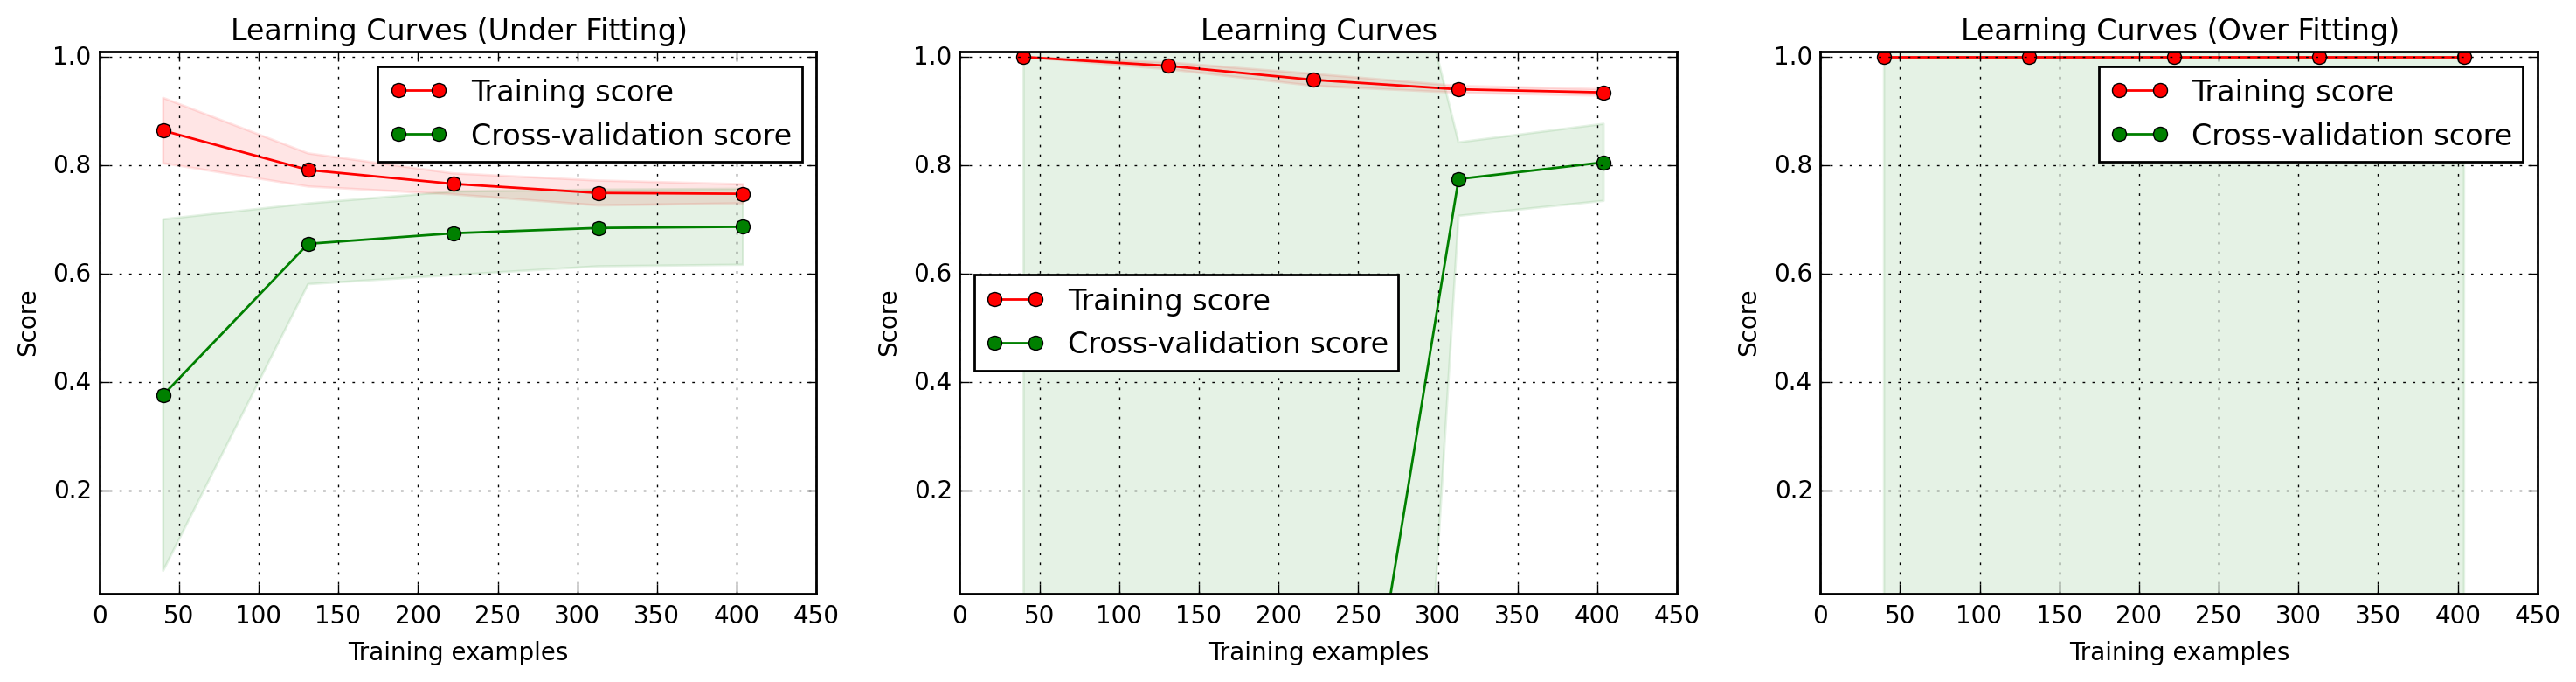

In [77]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
titles = ['Learning Curves (Under Fitting)',
         'Learning Curves',
         'Learning Curves (Over Fitting)']
degrees = [1,2,3]

plt.figure(figsize=(18, 4), dpi=200)

for i in range(len(degrees)):
    plt.subplot(1, 3, i+1)
    plot_learning_curve(polynomial_model(degrees[i]), 
                        titles[i],
                        x, y, 
                        ylim=(0.01,1.01),
                        cv=cv)
plt.show()